In [1]:
import pandas as pd
import numpy as np
import random


In [2]:
total_vids = 84
# 6 subt * 2 start pos * 2 pred colors = 24
# * 2 variants or recollapses = 48
# * 2 conditions (chase/mimic) = 96
# + 1 wander * 2 start pos * 2 pred color * 2 variants * 2 conditions simulated = 16
# = 112 vids

In [3]:
pwd

'/Volumes/rc/home/z/f0053cz/public_html/chase_mimic_study_v2'

Pick 84!!
- Current organization:  chase first (0-72) , mimic next (72-144), wander last (144-168)
- We need 6 vids at each subtlety level for chase, mimic and wander

In [4]:
df = pd.read_csv('./expt_material/randomization/stimInfo.csv', index_col=0)
df.head()

,Vid_nr,Subtlety,Color,StartPos,Motivator,Vid_names,Iter_nr,ID
0,0,0,Bl,L,Chase,chase_pred_subt0_Black_Posx_350.webm,v0,0_Bl_L_Chase_v0
1,1,0,Bl,L,Chase,chase_pred_subt0_Black_Posx_350_var0.webm,v1,0_Bl_L_Chase_v1
2,2,0,Bl,L,Chase,chase_pred_subt0_Black_Posx_350_var1.webm,v2,0_Bl_L_Chase_v2
3,3,0,Bl,R,Chase,chase_pred_subt0_Black_Posx_850.webm,v0,0_Bl_R_Chase_v0
4,4,0,Bl,R,Chase,chase_pred_subt0_Black_Posx_850_var0.webm,v1,0_Bl_R_Chase_v1


In [5]:
df.groupby(['Motivator']).count()

,Vid_nr,Subtlety,Color,StartPos,Vid_names,Iter_nr,ID
Motivator,,,,,,,
Chase,72,72,72,72,72,72,72
Mimic,72,72,72,72,72,72,72
Wander,24,24,24,24,24,24,24


# Randomizing for each sub

In [6]:
for i in range(4):
    print(np.random.randint(3)) # random integer between 0 and 2

0
2
1
2


In [7]:
import random

In [8]:
def select_versions():
    versions = [random.sample(set([0,1,2]), 2) for i in range(12)] # need only 1 version for wander (last ind)
    versions.append(random.sample(set([0,1,2,3,4,5]), 3))
    versions=np.array(versions)
    chasev = {}
    inds = np.arange(0,6)
    chasev['main'] = [i[0] for i in versions[inds]]
    chasev['sub'] =  [i[1] for i in versions[inds]]
    mimicv = {}
    inds = np.arange(6,12)
    mimicv['main'] = [i[0] for i in versions[inds]]
    mimicv['sub'] =  [i[1] for i in versions[inds]]
    wanderv = {}
    inds = [12] #np.arange(12,14)
    wanderv =  versions[-1]
    return chasev,mimicv,wanderv
#    versions,chasev, mimicv, wanderv

In [10]:
def select_stimuli(chasev,mimicv,wanderv):
    stim_list = []
    for trial_type in ["Chase","Mimic","Wander"]:
        if trial_type == "Wander": 
            right_version = (df['Iter_nr'] == str('v'+str(wanderv[0]))) | (df['Iter_nr'] == str('v'+str(wanderv[1]))) | (df['Iter_nr'] == str('v'+str(wanderv[2])))     
            rows = (right_version) & (df['Motivator']==trial_type)
            #print('right_version',len(np.where(right_version)[0]))
            #print('wander:',len(np.where(rows)[0]))
            stim_list.extend(np.where(rows)[0])
        else: # chase or mimic
            for i,subt in enumerate([0,30,60,90,120,150]):
                if trial_type == "Chase":
                    mainv,altv = chasev['main'][i],chasev['sub'][i] #randoma.randint(0,1) # 0 or 1
                elif trial_type == "Mimic":
                    mainv,altv = mimicv['main'][i],mimicv['sub'][i] #randoma.randint(0,1) # 0 or 1
                print('mainv',mainv)
                rows = (df['Subtlety'] == subt) & (df['Iter_nr'] == str('v'+str(mainv))) & (df['Motivator']==trial_type)
                numrows = len(np.where(rows)[0])
                if numrows != 1:
                    print(df.loc[rows,'Subtlety'].values)
                    print(df.loc[rows,'Color'].values)
                    print(df.loc[rows,'StartPos'].values)
                    print(df.loc[rows,'Iter_nr'].values)
                #print(trial_type, np.where(rows)[0])
                stim_list.extend(np.where(rows)[0])

                rows = (df['Subtlety'] == subt) & (df['Iter_nr'] == str('v'+str(altv))) & (df['Motivator']==trial_type)
                print(subt,altv,trial_type)
                #print(trial_type, np.where(rows)[0])
                #subset = random.sample(list(np.where(rows)[0]),2) # for the second version, pick 2
                #stim_list.extend(subset)
                altset_inds = np.where(rows)[0]
                #print(subt)
                if i%2 == 0:
                    subset = random.sample(list(np.arange(4)),2) # for the second version, pick 2
                else:
                    subset = [i for i in range(4) if i not in (subset)]
                #print('subset',subset)
                #print('altset_inds[subset]',altset_inds[subset])
                print(subt, altset_inds, subset)
                stim_list.extend(altset_inds[subset])
            #print(len(stim_list))
    
    stim_list = [int(i) for i in stim_list]
    return stim_list
    
chasev,mimicv,wanderv = select_versions()
stim_list = select_stimuli(chasev,mimicv,wanderv)
len(stim_list)

mainv 1
[0 0 0 0]
['Bl' 'Bl' 'Gr' 'Gr']
['L' 'R' 'L' 'R']
['v1' 'v1' 'v1' 'v1']
0 2 Chase
0 [ 2  5 38 41] [0, 3]
mainv 2
[30 30 30 30]
['Bl' 'Bl' 'Gr' 'Gr']
['L' 'R' 'L' 'R']
['v2' 'v2' 'v2' 'v2']
30 1 Chase
30 [ 7 10 43 46] [1, 2]
mainv 0
[60 60 60 60]
['Bl' 'Bl' 'Gr' 'Gr']
['L' 'R' 'L' 'R']
['v0' 'v0' 'v0' 'v0']
60 2 Chase
60 [14 17 50 53] [1, 3]
mainv 1
[90 90 90 90]
['Bl' 'Bl' 'Gr' 'Gr']
['L' 'R' 'L' 'R']
['v1' 'v1' 'v1' 'v1']
90 0 Chase
90 [18 21 54 57] [0, 2]
mainv 2
[120 120 120 120]
['Bl' 'Bl' 'Gr' 'Gr']
['L' 'R' 'L' 'R']
['v2' 'v2' 'v2' 'v2']
120 1 Chase
120 [25 28 61 64] [0, 1]
mainv 2
[150 150 150 150]
['Bl' 'Bl' 'Gr' 'Gr']
['L' 'R' 'L' 'R']
['v2' 'v2' 'v2' 'v2']
150 1 Chase
150 [31 34 67 70] [2, 3]
mainv 1
[0 0 0 0]
['Bl' 'Bl' 'Gr' 'Gr']
['L' 'R' 'L' 'R']
['v1' 'v1' 'v1' 'v1']
0 2 Mimic
0 [ 74  77 110 113] [3, 0]
mainv 1
[30 30 30 30]
['Bl' 'Bl' 'Gr' 'Gr']
['L' 'R' 'L' 'R']
['v1' 'v1' 'v1' 'v1']
30 0 Mimic
30 [ 78  81 114 117] [1, 2]
mainv 0
[60 60 60 60]
['Bl' 'Bl' 'Gr' 'G

/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


84

In [11]:
for i in stim_list[:5]: # this will be  thr first 5 stimuli of one sequence (before shuffling)
    print(df.iloc[i,5]) 

chase_pred_subt0_Black_Posx_350_var0.webm
chase_pred_subt0_Black_Posx_850_var0.webm
chase_pred_subt0_Grey_Posx_350_var0.webm
chase_pred_subt0_Grey_Posx_850_var0.webm
chase_pred_subt0_Black_Posx_350_var1.webm


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


mainv 2
[0 0 0 0]
['Bl' 'Bl' 'Gr' 'Gr']
['L' 'R' 'L' 'R']
['v2' 'v2' 'v2' 'v2']
0 0 Chase
0 [ 0  3 36 39] [0, 3]
mainv 0
[30 30 30 30]
['Bl' 'Bl' 'Gr' 'Gr']
['L' 'R' 'L' 'R']
['v0' 'v0' 'v0' 'v0']
30 1 Chase
30 [ 7 10 43 46] [1, 2]
mainv 0
[60 60 60 60]
['Bl' 'Bl' 'Gr' 'Gr']
['L' 'R' 'L' 'R']
['v0' 'v0' 'v0' 'v0']
60 1 Chase
60 [13 16 49 52] [1, 0]
mainv 2
[90 90 90 90]
['Bl' 'Bl' 'Gr' 'Gr']
['L' 'R' 'L' 'R']
['v2' 'v2' 'v2' 'v2']
90 0 Chase
90 [18 21 54 57] [2, 3]
mainv 1
[120 120 120 120]
['Bl' 'Bl' 'Gr' 'Gr']
['L' 'R' 'L' 'R']
['v1' 'v1' 'v1' 'v1']
120 0 Chase
120 [24 27 60 63] [2, 0]
mainv 1
[150 150 150 150]
['Bl' 'Bl' 'Gr' 'Gr']
['L' 'R' 'L' 'R']
['v1' 'v1' 'v1' 'v1']
150 2 Chase
150 [32 35 68 71] [1, 3]
mainv 1
[0 0 0 0]
['Bl' 'Bl' 'Gr' 'Gr']
['L' 'R' 'L' 'R']
['v1' 'v1' 'v1' 'v1']
0 2 Mimic
0 [ 74  77 110 113] [1, 2]
mainv 2
[30 30 30 30]
['Bl' 'Bl' 'Gr' 'Gr']
['L' 'R' 'L' 'R']
['v2' 'v2' 'v2' 'v2']
30 0 Mimic
30 [ 78  81 114 117] [0, 3]
mainv 1
[60 60 60 60]
['Bl' 'Bl' 'Gr' 'G

Text(33.0, 0.5, 'set nr')

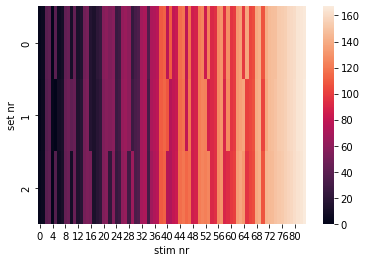

In [13]:
#nsets = 21 #  21 (earlier version - 7 sets for the pilot with n=21)
nsets = 100 # keeping extra for the main task (plan- 17 sets * 3 subs per set)
stim_subsets = np.zeros((nsets,84))-1#,dtype=int)-1
#stim_subsets[:] = np.nan
for rep in range(nsets):
    chasev,mimicv,wanderv = select_versions()
    stim_subsets[rep,:] = select_stimuli(chasev,mimicv,wanderv)
sns.heatmap(stim_subsets[:3,:])
plt.xlabel('stim nr')
plt.ylabel('set nr')
#stim_subsets[:3,:]

In [14]:
nsets

100

In [15]:
# scramble it

nreps =  1 # nr. of times to shuffle EACH sequence (to reduce serial effects) - 3 reps for the pilot with n=21
stim_subsets_shuffled = [] #np.zeros((stim_subsets.shape[0]*10, stim_subsets.shape[1]))
for set_ in range(nsets): # 21
    for i in range(nreps): # 1 rep (i.e., unique)
        stim_subsets_shuffled.append(list(np.random.permutation(stim_subsets[set_,:])))
stim_subsets_shuffled_array = np.array(stim_subsets_shuffled)

'''nreps =  3 # nr. of times to shuffle EACH sequence (to reduce serial effects) - 3 reps for the pilot with n=21
stim_subsets_shuffled = [] #np.zeros((stim_subsets.shape[0]*10, stim_subsets.shape[1]))
for set_ in range(nsets): # 10
    for i in range(nreps): # 10 reps
        stim_subsets_shuffled.append(list(np.random.permutation(stim_subsets[set_,:])))
stim_subsets_shuffled_array = np.array(stim_subsets_shuffled)
#stim_subsets_shuffled.shape'''

'nreps =  3 # nr. of times to shuffle EACH sequence (to reduce serial effects) - 3 reps for the pilot with n=21\nstim_subsets_shuffled = [] #np.zeros((stim_subsets.shape[0]*10, stim_subsets.shape[1]))\nfor set_ in range(nsets): # 10\n    for i in range(nreps): # 10 reps\n        stim_subsets_shuffled.append(list(np.random.permutation(stim_subsets[set_,:])))\nstim_subsets_shuffled_array = np.array(stim_subsets_shuffled)\n#stim_subsets_shuffled.shape'

In [16]:
len(stim_subsets_shuffled),len(stim_subsets_shuffled[0])

(100, 84)

In [17]:
import json

In [19]:
data = {}
data['file_ind'] = stim_subsets_shuffled
json_data = json.dumps(data) 

pilot = 0
if pilot:
    foldername = 'pilot'
else:
    foldername = 'main'

with open(f'./expt_material/stim_set/' + foldername + '/not_final/stimSets.json', 'w') as outfile:
    json.dump(json_data, outfile)   

with open(f'./expt_material/stim_set/' + foldername + '/not_final/stimSets.js', 'w') as outfile:
    outfile.write(json_data)
    
with open(f'./expt_material/stim_set/' + foldername + '/not_final/stimSets_list.js', 'w') as outfile:
    outfile.write(json.dumps(stim_subsets_shuffled))

In [20]:
json_data_js = json_data[0] + json_data[2:10] + "=" + json_data[12:]
print(json_data_js[:15])

{file_ind= [[12


In [21]:
#json_data = json.dumps(stim_subsets_shuffled_list)
#print(json_data)

for i in range(len(stim_subsets_shuffled)): # create as many files as there are permutations (21 files for the pilot)
    data = {}
    data['file_ind'] = [int(j) for j in stim_subsets_shuffled[i]]
    json_data = json.dumps(data) 

    with open(f'./expt_material/stim_set/' +  foldername + '/not_final/separate/stimSet_{i+1}.json', 'w') as outfile:
        json.dump(json_data, outfile)   
    
    with open(f'./expt_material/stim_set/' + foldername + '/not_final/separate/stimSet_{i+1}.js', 'w') as outfile:
        outfile.write(json_data)

In [22]:
stim_subsets_shuffled[11]

[58.0,
 14.0,
 31.0,
 87.0,
 113.0,
 96.0,
 85.0,
 52.0,
 34.0,
 100.0,
 70.0,
 53.0,
 64.0,
 153.0,
 127.0,
 76.0,
 164.0,
 61.0,
 39.0,
 42.0,
 105.0,
 158.0,
 9.0,
 2.0,
 32.0,
 165.0,
 23.0,
 79.0,
 10.0,
 6.0,
 126.0,
 151.0,
 118.0,
 5.0,
 138.0,
 107.0,
 159.0,
 163.0,
 133.0,
 104.0,
 82.0,
 129.0,
 130.0,
 84.0,
 91.0,
 63.0,
 152.0,
 60.0,
 115.0,
 97.0,
 35.0,
 13.0,
 147.0,
 114.0,
 67.0,
 94.0,
 136.0,
 121.0,
 49.0,
 124.0,
 25.0,
 56.0,
 43.0,
 140.0,
 19.0,
 74.0,
 22.0,
 45.0,
 41.0,
 0.0,
 55.0,
 112.0,
 135.0,
 143.0,
 28.0,
 145.0,
 73.0,
 88.0,
 81.0,
 146.0,
 16.0,
 109.0,
 157.0,
 38.0]

In [13]:
'''print('wander')
#for trial_type in ['Wander']: # chase/mimic
#version_ind = random.randint(0,1) # 1 or 2

mainv,altv = wanderv['main'][0],wanderv['sub'][0] #randoma.randint(0,1) # 0 or 1
rows = (df['Motivator'] == 'Wander') & (df['Iter_nr'] == str('v'+str(mainv)))
print('Main',np.where(rows)[0])
stim_list.extend(np.where(rows)[0])

rows = (df['Iter_nr'] == str('v'+str(altv))) & (df['Motivator']=='Wander')
print('Alt',np.where(rows)[0])

subset = random.sample(list(np.where(rows)[0]),4) # pick 4 out of the remaining 8 (2 for 180 chase, 2 for 180 mimic)
print('subset alt',subset) 
stim_list.extend(subset)
len(stim_list)'''

wander
Main [146 149 152 155 158 161 164 167]
Alt [145 148 151 154 157 160 163 166]
subset alt [154, 166, 145, 151]


84

In [14]:
stim_list[:5]

[2, 5, 8, 11, 7]

# oldv

In [29]:
#Method: 1. for each sub, select one main version. i.e.,
version = {}
version['chase'] = [0,0,0,1,1,1,2,2,2]
random.shuffle(version['chase']) # which version for each subtlety - chase
version['mimic'] = [0,0,0,1,1,1,2,2,2]
random.shuffle(version['mimic']) # which version for each subtlrty - mimic
version['wander'] = [1,2]
random.shuffle(version['wander']) # which version for chase and mimic 180 deg

stim_list = []
for subt in [0,30,60,90,120,150]:
    for trial_type in ['Chase','Mimic']: # chase/mimic
        version_ind = random.randint(0,1) # 0 or 1
        rows = (df['Subtlety'] == subt) & (df['Iter_nr'] == str('v'+str(version_ind))) & (df['Motivator']==trial_type)
        print(trial_type, np.where(rows)[0])
        stim_list.extend(np.where(rows)[0])

        if version_ind == 0:
            rows = (df['Subtlety'] == subt) & (df['Iter_nr'] == 'v1') & (df['Motivator']==trial_type)
            print('v0', trial_type, np.where(rows)[0])
        elif version_ind == 1:
            rows = (df['Subtlety'] == subt) & (df['Iter_nr'] == 'v0') & (df['Motivator']==trial_type)
            print('v1',trial_type, np.where(rows)[0])
        #subset = random.sample(list(np.where(rows)[0]),2) # for the second version, pick 2
        altset_inds = np.where(rows)[0]
        subset = random.sample(list(np.arange(4)),2) # for the second version, pick 2
        print('subset',subset)
        print('altset_inds[subset]',altset_inds[subset])
        stim_list.extend(altset_inds[subset])
        
print('wander')
#for trial_type in ['Wander']: # chase/mimic
version_ind = random.randint(0,1) # 1 or 2
rows = (df['Motivator'] == 'Wander') & (df['Iter_nr'] == str('v'+str(version_ind)))
print(np.where(rows)[0])
if version_ind == 0:
    rows = (df['Iter_nr'] == 'v1') & (df['Motivator']=='Wander')
    print(trial_type, np.where(rows)[0])
elif version_ind == 1:
    rows = (df['Iter_nr'] == 'v0') & (df['Motivator']=='Wander')
    print(trial_type, np.where(rows)[0])
subset = random.sample(list(np.where(rows)[0]),4) # pick 4 out of the remaining 8 (2 for 180 chase, 2 for 180 mimic)
print(subset) 
stim_list.extend(subset)

stim_list.extend(np.where(rows)[0])
print(stim_list, len(stim_list))

Chase [ 1  4  7 10]
v1 Chase [0 3 6 9]
subset [0, 2]
altset_inds[subset] [0 6]
Mimic [72 75 78 81]
v0 Mimic [73 76 79 82]
subset [1, 2]
altset_inds[subset] [76 79]
Chase [12 15 18 21]
v0 Chase [13 16 19 22]
subset [0, 2]
altset_inds[subset] [13 19]
Mimic [84 87 90 93]
v0 Mimic [85 88 91 94]
subset [3, 1]
altset_inds[subset] [94 88]
Chase [24 27 30 33]
v0 Chase [25 28 31 34]
subset [1, 0]
altset_inds[subset] [28 25]
Mimic [ 97 100 103 106]
v1 Mimic [ 96  99 102 105]
subset [2, 0]
altset_inds[subset] [102  96]
Chase [37 40 43 46]
v1 Chase [36 39 42 45]
subset [1, 2]
altset_inds[subset] [39 42]
Mimic [109 112 115 118]
v1 Mimic [108 111 114 117]
subset [2, 1]
altset_inds[subset] [114 111]
Chase [48 51 54 57]
v0 Chase [49 52 55 58]
subset [3, 1]
altset_inds[subset] [58 52]
Mimic [121 124 127 130]
v1 Mimic [120 123 126 129]
subset [1, 3]
altset_inds[subset] [123 129]
Chase [61 64 67 70]
v1 Chase [60 63 66 69]
subset [2, 3]
altset_inds[subset] [66 69]
Mimic [133 136 139 142]
v1 Mimic [132 135

In [23]:
random.sample(list(np.arange(4)),2)

[0, 2]

In [18]:
subset

[144, 147, 150, 159]

In [134]:
df.loc[stim_list,:]

,Vid_nr,Subtlety,Color,StartPos,Motivator,Vid_names,Iter_nr,ID
1,1,0,Gr,L,Chase,chase__pred_subt0_Colorg_Posx_350_1.webm,v1,0_Gr_L_Chase_v1
3,3,0,Gr,R,Chase,chase__pred_subt0_Colorg_Posx_850_1.webm,v1,0_Gr_R_Chase_v1
5,5,0,Bl,L,Chase,chase__pred_subt0_Colorb_Posx_350_1.webm,v1,0_Bl_L_Chase_v1
7,7,0,Bl,R,Chase,chase__pred_subt0_Colorb_Posx_850_1.webm,v1,0_Bl_R_Chase_v1
4,4,0,Bl,L,Chase,chase_pred_subt0_Colorb_Posx_350.webm,v0,0_Bl_L_Chase_v0
...,...,...,...,...,...,...,...,...
102,102,180,Bl,R,Wander,wander_pred_Grey_Posx_850.webm,v0,180_Bl_R_Wander_v0
104,104,180,Gr,L,Wander,wander_pred_Grey_Posx_350.webm,v0,180_Gr_L_Wander_v0
106,106,180,Gr,R,Wander,wander_pred_Grey_Posx_850.webm,v0,180_Gr_R_Wander_v0
108,108,180,Bl,L,Wander,wander_pred_Grey_Posx_350.webm,v0,180_Bl_L_Wander_v0


# to do - see if there can be biases!!
# implement in javascript!